# Importing Libraries

In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing Dataset

In [14]:
data = pd.read_csv("student_scores - student_scores.csv")
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting Data

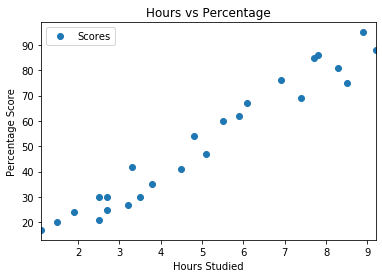

In [15]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**



In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,
                                                   random_state = 0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression().fit(X_train, y_train)
print("Training complete.")

Training complete.


In [7]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [9.94167834]
linear model intercept (b): 1.932
R-squared score (training): 0.948
R-squared score (test): 0.937


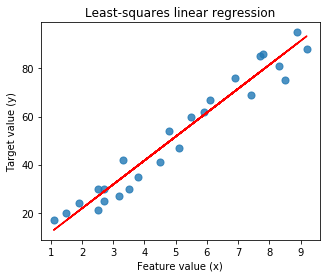

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
print(X_test) # Testing data - In Hours
y_pred = linreg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [11]:
hours = 9.25

hour=np.array([[hours],])
own_pred = linreg.predict(hour)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341655


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. For a small dataset, checking MAE is better than accuracy.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486
